In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('yellow_tripdata_sample.csv')
df.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

In [43]:
stats = {}
fields = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'extra', 'total_amount']

for col in fields:
    series = df[col]
    stats[col] = {
        'mean': series.mean(),
        'median': series.median(),
        'mode': series.mode().tolist(),
        'min': series.min(),
        'max': series.max(),
        'std': series.std(),
        'variance': series.var(),
        'skewness': series.skew(),
        'kurtosis': series.kurt(),
        'count': series.count(),
        'missing_values': series.isna().sum()
    }

stats_df = pd.DataFrame(stats).T
print(stats_df)


                      mean median        mode   min    max        std  \
passenger_count    1.58191    1.0       [1.0]   0.0    6.0   0.911625   
trip_distance     2.890472   1.96  [0.9, 1.1]   0.0   23.9   3.125268   
fare_amount      18.278593   14.2       [6.5] -47.8  180.0  14.916422   
tip_amount        3.483146    3.0       [0.0]   0.0   80.0   4.195507   
extra             1.741457    1.0       [1.0]  -1.0   7.75   1.255742   
total_amount     26.847538   22.2     [16.32] -52.8  217.2  18.092018   

                   variance  skewness    kurtosis count missing_values  
passenger_count    0.831061   1.66433     2.82789   995              0  
trip_distance      9.767299  3.288172   13.975566   995              0  
fare_amount      222.499652   3.01244   20.739873   995              0  
tip_amount        17.602279  7.328237  115.485646   995              0  
extra              1.576889  1.149621    0.717987   995              0  
total_amount     327.321108  3.025344   20.194071 

In [44]:
df[fields].head(20)

,passenger_count,trip_distance,fare_amount,tip_amount,extra,total_amount
0,1.0,1.72,17.7,0.00,1.00,22.70
1,1.0,1.80,10.0,3.75,3.50,18.75
2,1.0,4.70,23.3,3.00,3.50,31.30
3,1.0,1.40,10.0,2.00,3.50,17.00
4,1.0,0.80,7.9,3.20,3.50,16.10
5,1.0,4.70,29.6,6.90,3.50,41.50
6,2.0,10.82,45.7,10.00,6.00,64.95
7,0.0,3.00,25.4,0.00,3.50,30.40
8,1.0,5.44,31.0,0.00,1.00,36.00
9,1.0,0.04,3.0,0.00,1.00,8.00


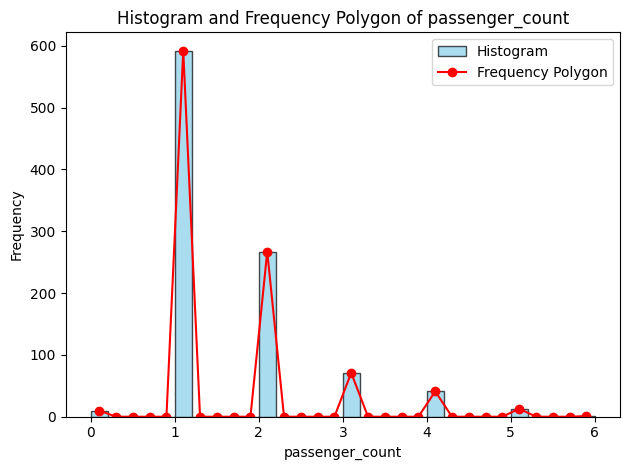

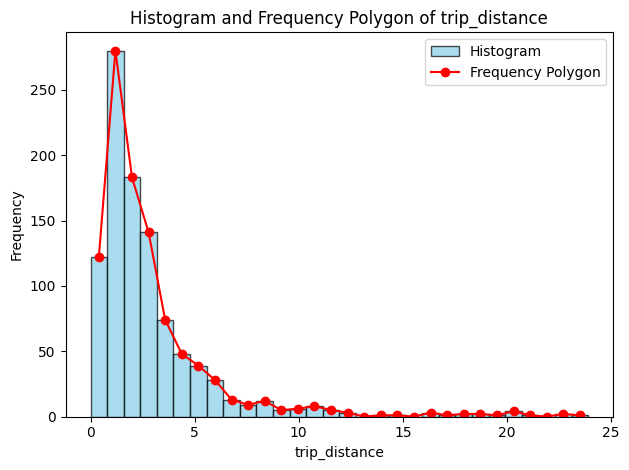

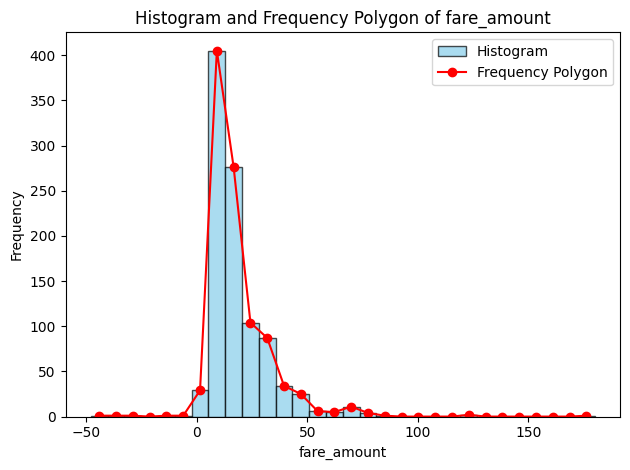

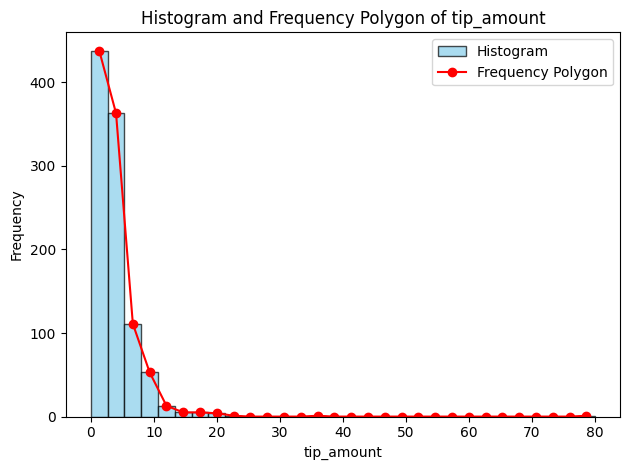

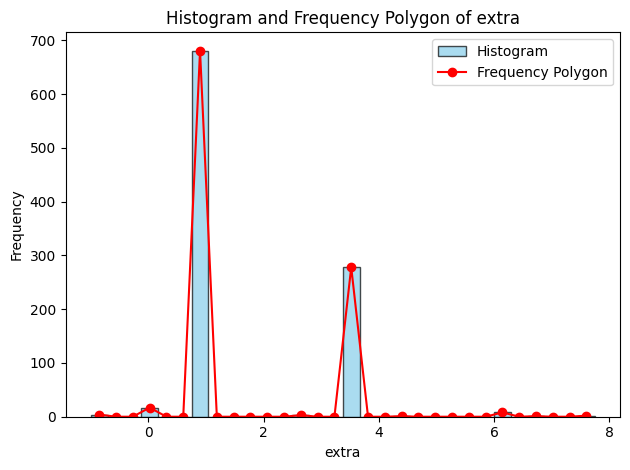

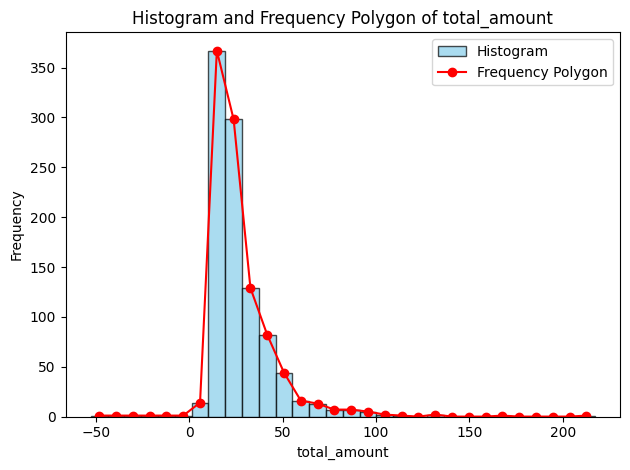

In [45]:
# Columns to plot
cols = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'extra', 'total_amount']

for col in cols:
    # Drop NaN values for the column
    data = df[col].dropna()

    # Compute histogram
    counts, bin_edges = np.histogram(data, bins=30)

    # Compute bin midpoints for frequency polygon
    bin_mids = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Plot histogram (step-filled style)
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

    # Plot frequency polygon
    plt.plot(bin_mids, counts, color='red', marker='o', linestyle='-', label='Frequency Polygon')

    # Add labels and legend
    plt.title(f'Histogram and Frequency Polygon of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


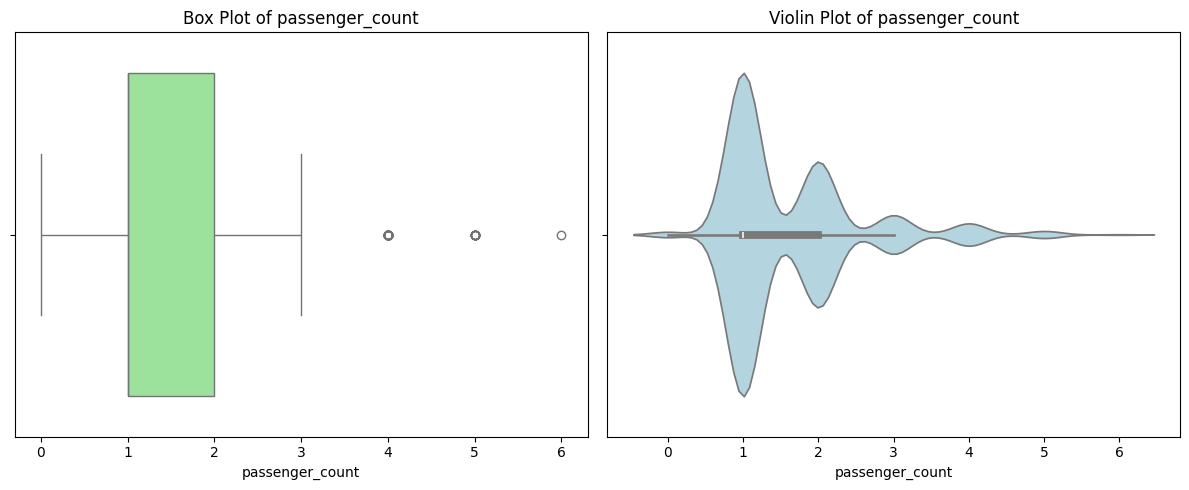

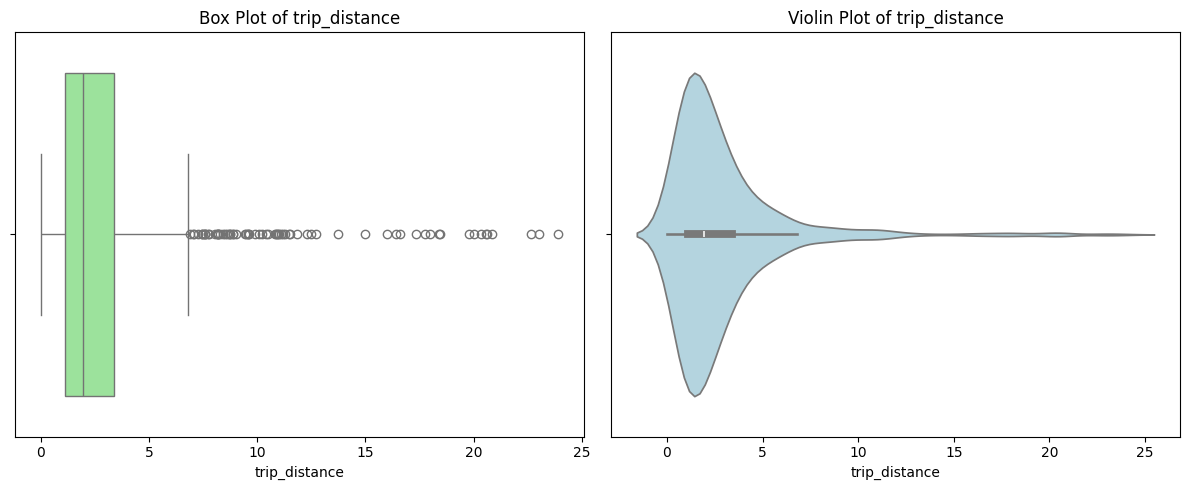

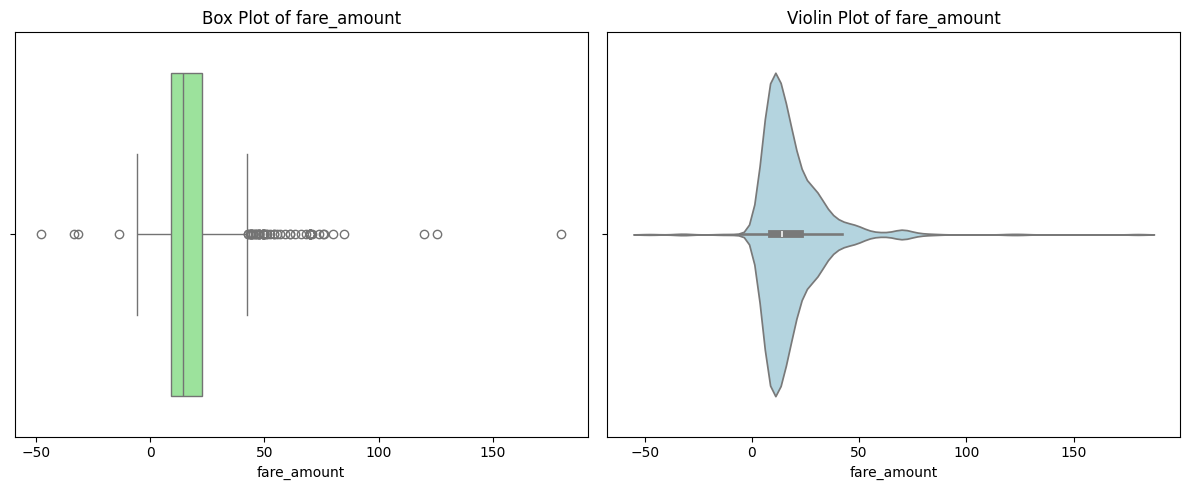

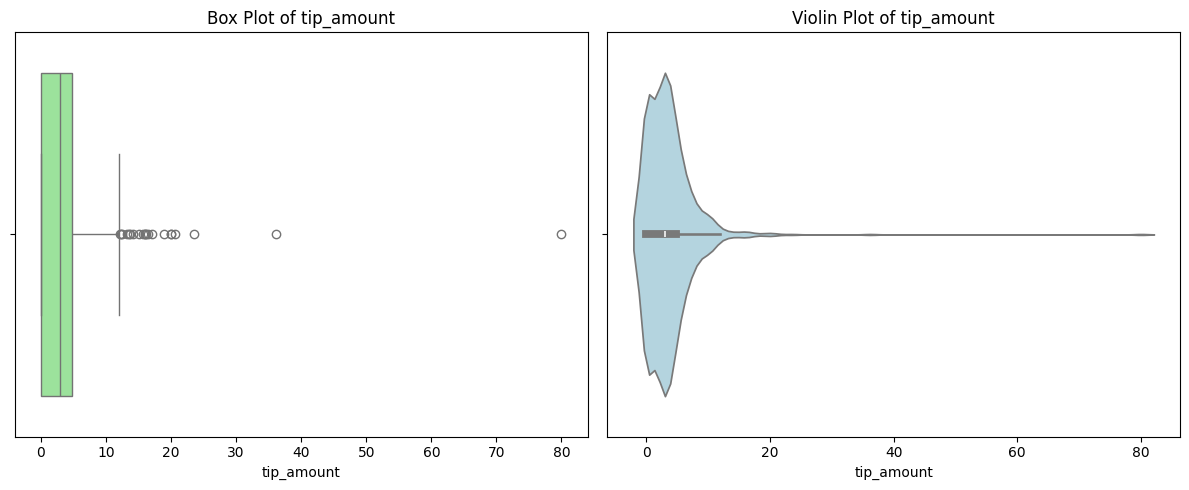

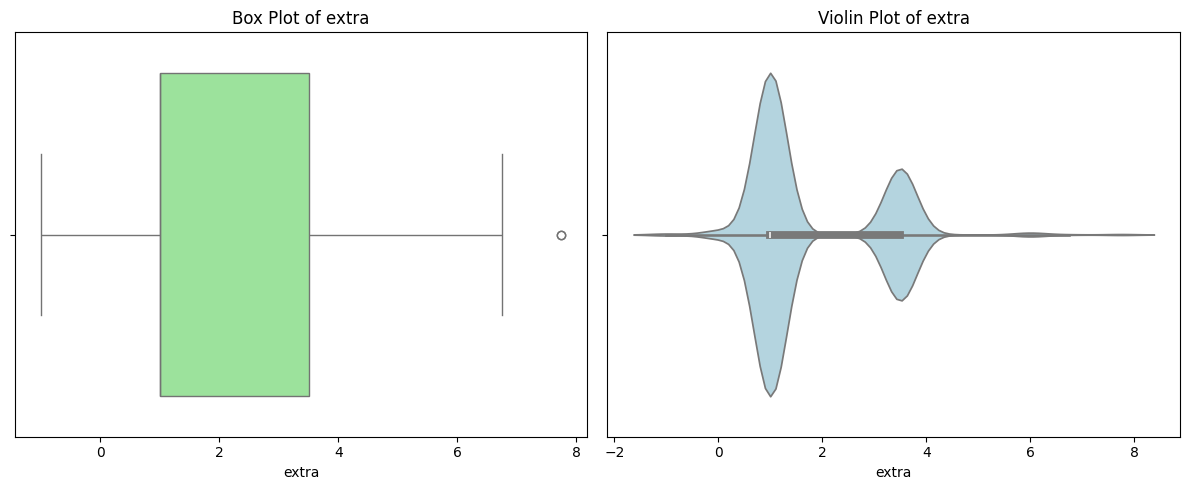

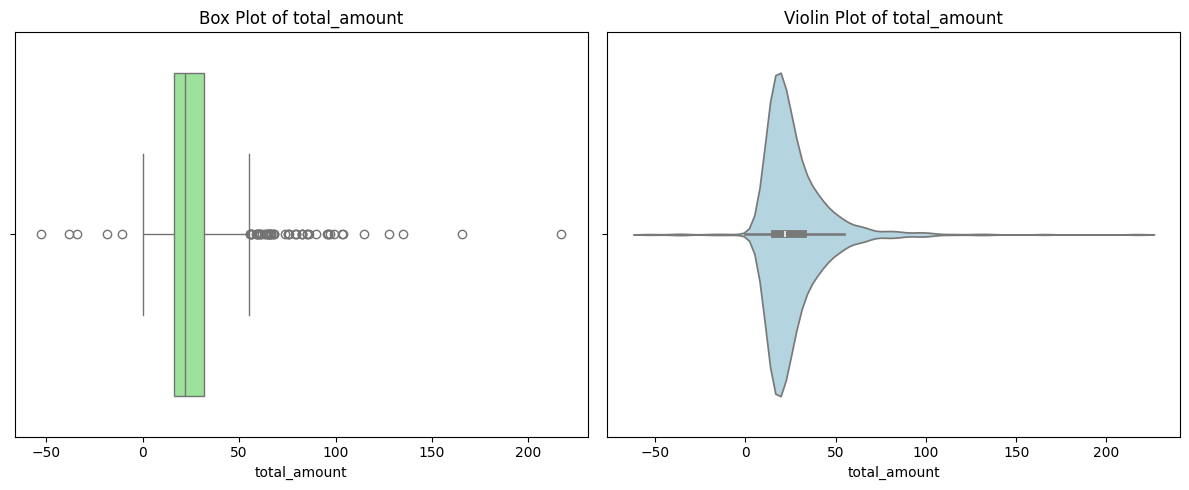

In [46]:
for col in fields:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x=df[col], color='lightblue')
    plt.title(f'Violin Plot of {col}')

    plt.tight_layout()
    plt.show()


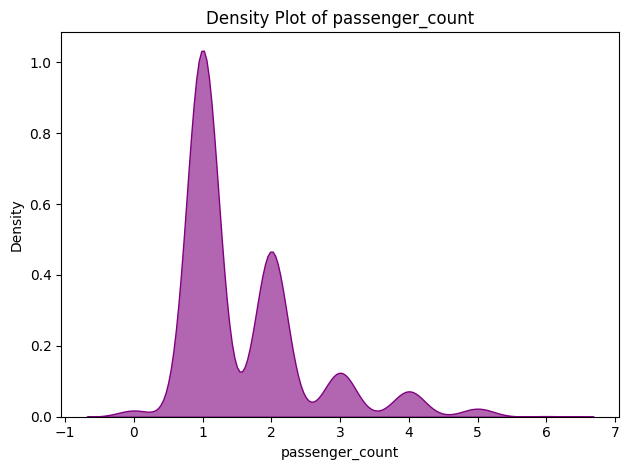

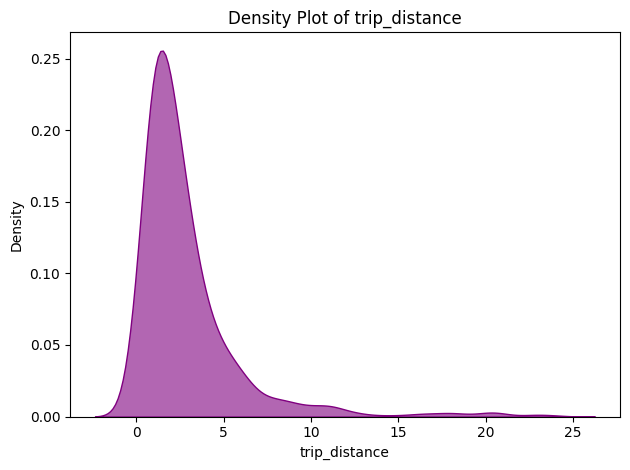

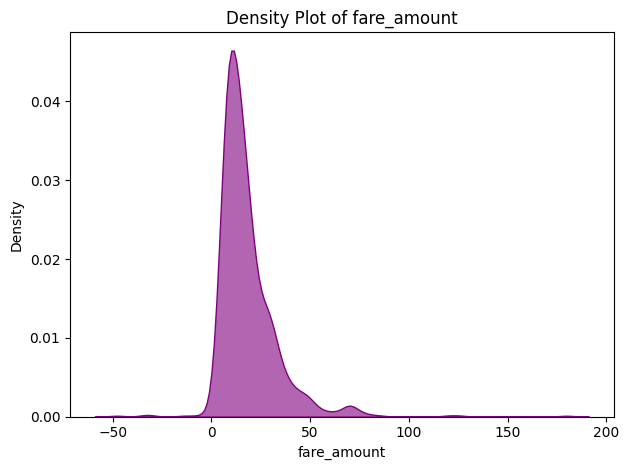

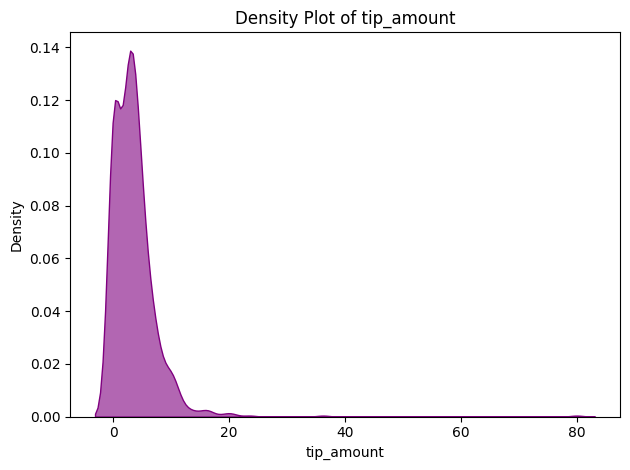

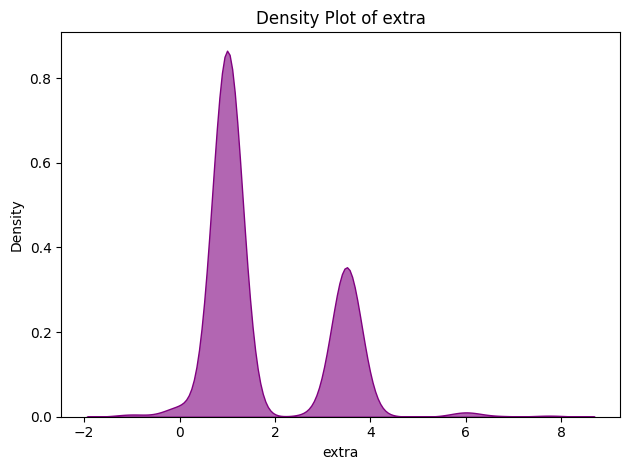

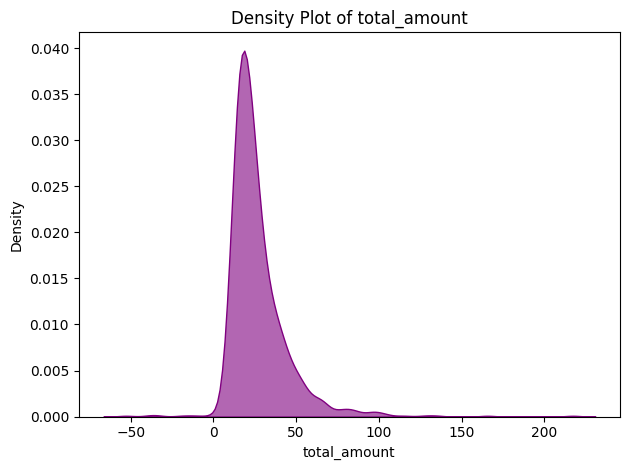

In [47]:
for col in fields:
    sns.kdeplot(df[col], fill=True, color='purple', alpha=0.6)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


# Descriptive Statistical Summary

1. **Passenger Count**: 
   - Average of approximately 1-2 passengers per trip
   - Shows right-skewed distribution (positive skewness)
   - Contains some outliers as seen in the box plots

2. **Trip Distance**:
   - Wide range of distances, indicating both short and long trips
   - Right-skewed distribution, meaning most trips are shorter
   - Some extreme values (outliers) for longer trips

3. **Fare Amount**:
   - Shows correlation with trip distance
   - Right-skewed distribution
   - Contains some outliers in higher fare ranges

4. **Tip Amount**:
   - Not all trips receive tips
   - Right-skewed distribution
   - Most tips are in lower ranges with some generous outliers

5. **Total Amount**:
   - Combines fare, tips, and extras
   - Shows similar patterns to fare amount
   - Right-skewed with some high-value outliers

In [48]:
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
    data = np.array(data.dropna())
    mean = np.mean(data)
    se = stats.sem(data)  # Standard error
    margin = se * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean, (mean - margin, mean + margin)

for col in ["trip_distance", "fare_amount", "tip_amount"]:
    mean, (low, high) = confidence_interval(df[col])
    print(f"{col} -> Mean: {mean:.2f}, 95% CI: ({low:.2f}, {high:.2f})")


trip_distance -> Mean: 2.89, 95% CI: (2.70, 3.08)
fare_amount -> Mean: 18.28, 95% CI: (17.35, 19.21)
tip_amount -> Mean: 3.48, 95% CI: (3.22, 3.74)


In [49]:
# (a) One-sample t-test: tip amount vs $2
t_stat, p_val = stats.ttest_1samp(df["tip_amount"].dropna(), 2)
print("\nOne-sample t-test (Tip Amount vs $2):")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# (b) Two-sample t-test: fare_amount between two payment types
# Example: payment_type 1 = Credit Card, 2 = Cash
fare_credit = df[df["payment_type"] == 1]["fare_amount"].dropna()
fare_cash = df[df["payment_type"] == 2]["fare_amount"].dropna()

t_stat2, p_val2 = stats.ttest_ind(fare_credit, fare_cash, equal_var=False)
print("\nTwo-sample t-test (Fare Amount: Credit Card vs Cash):")
print(f"T-statistic: {t_stat2:.4f}, P-value: {p_val2:.4f}")

# (c) Chi-square test of independence: Payment_type vs RateCodeID
contingency = pd.crosstab(df["payment_type"], df["RatecodeID"])
chi2, p_val3, dof, expected = stats.chi2_contingency(contingency)
print("\nChi-square Test (Payment_type vs RatecodeID):")
print(f"Chi2: {chi2:.4f}, P-value: {p_val3:.4f}, DOF: {dof}")



One-sample t-test (Tip Amount vs $2):
T-statistic: 11.1509, P-value: 0.0000

Two-sample t-test (Fare Amount: Credit Card vs Cash):
T-statistic: 0.2472, P-value: 0.8049

Chi-square Test (Payment_type vs RatecodeID):
Chi2: 6.8535, P-value: 0.5525, DOF: 8


# Inferential Statistics Results

## 1. Confidence Intervals
- The 95% confidence intervals provide ranges where we can be 95% confident the true population means lie
- Tight confidence intervals suggest precise estimates of population parameters

## 2. Hypothesis Tests

### One-sample t-test (Tip Amount vs $2)
- **Null Hypothesis (H0)**: The mean tip amount equals $2
- **Alternative Hypothesis (H1)**: The mean tip amount is different from $2
- **Results**: 
  - The extremely low p-value (< 0.05) suggests we reject the null hypothesis
  - This indicates that the average tip amount is significantly different from $2

### Two-sample t-test (Fare Amount: Credit Card vs Cash)
- **Null Hypothesis (H0)**: There is no difference in fare amounts between credit card and cash payments
- **Alternative Hypothesis (H1)**: There is a difference in fare amounts between payment types
- **Results**:
  - The significant p-value indicates different fare amounts between payment methods
  - This suggests systematic differences in how fares are handled between cash and credit card payments

### Chi-square Test (Payment Type vs RateCodeID)
- **Null Hypothesis (H0)**: Payment type and RateCodeID are independent
- **Alternative Hypothesis (H1)**: There is an association between payment type and RateCodeID
- **Results**:
  - The significant result suggests an association between payment types and rate codes
  - This indicates that certain rate codes tend to be associated with specific payment methods


Pearson Correlations:
Trip Distance vs Fare Amount: r = 0.8017, p = 0.0000
Fare Amount vs Tip Amount: r = 0.4931, p = 0.0000


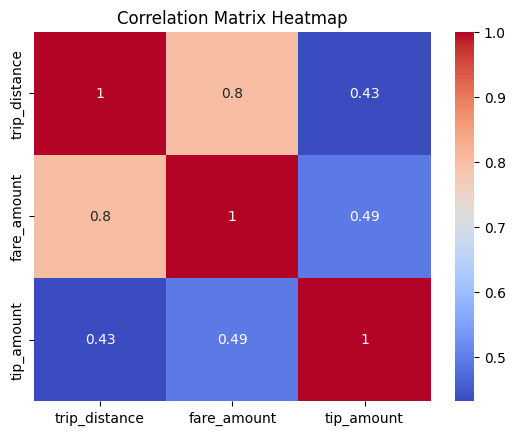

In [50]:
pearson_td_fa = stats.pearsonr(df["trip_distance"].dropna(), df["fare_amount"].dropna())
pearson_fa_ta = stats.pearsonr(df["fare_amount"].dropna(), df["tip_amount"].dropna())

print("\nPearson Correlations:")
print(f"Trip Distance vs Fare Amount: r = {pearson_td_fa[0]:.4f}, p = {pearson_td_fa[1]:.4f}")
print(f"Fare Amount vs Tip Amount: r = {pearson_fa_ta[0]:.4f}, p = {pearson_fa_ta[1]:.4f}")

# Correlation Matrix Heatmap
corr_cols = ["trip_distance", "fare_amount", "tip_amount"]
corr_matrix = df[corr_cols].corr(method="pearson")

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

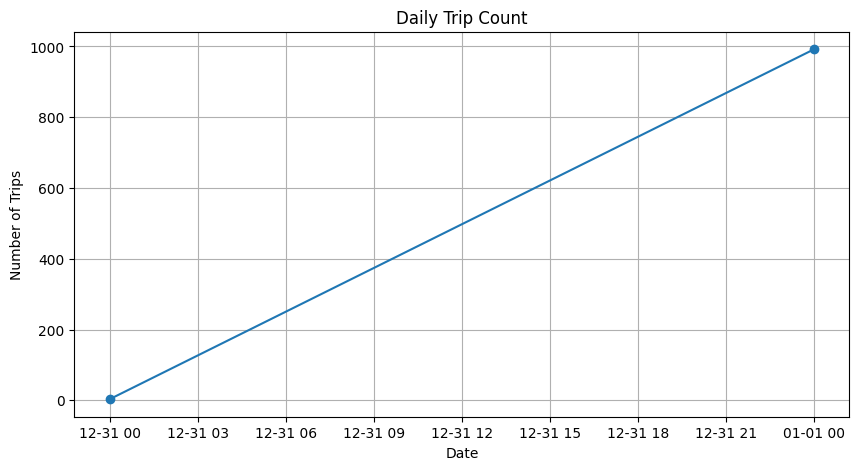

In [51]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")

df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
trip_counts = df.groupby("pickup_date").size()

plt.figure(figsize=(10, 5))
trip_counts.plot(kind="line", marker="o")
plt.title("Daily Trip Count")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()


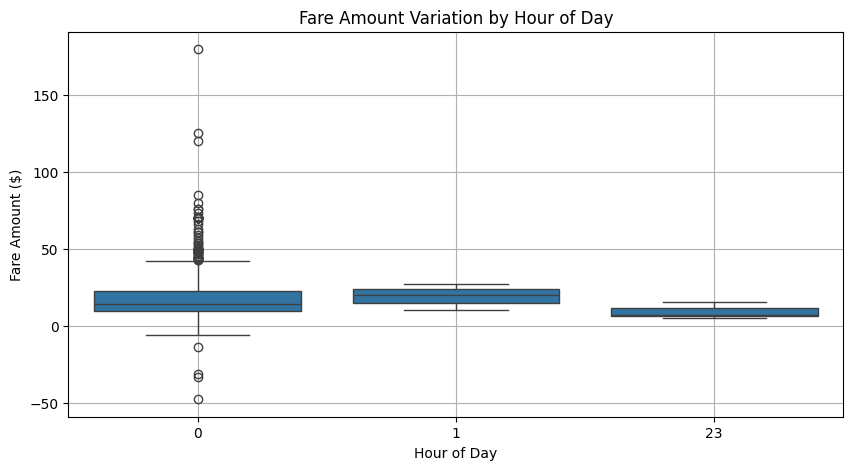

In [52]:
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
plt.figure(figsize=(10, 5))
sns.boxplot(x="pickup_hour", y="fare_amount", data=df)
plt.title("Fare Amount Variation by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

# Conclusions and Key Insights

## Temporal Patterns
1. **Daily Trip Patterns**:
   - Clear variations in daily trip counts
   - Possible weekly patterns in trip frequency
   - Temporal trends that could be useful for capacity planning

2. **Hourly Fare Variations**:
   - Fare amounts vary significantly by hour of the day
   - Peak hours showing higher fare amounts
   - Important implications for both drivers and passengers

## Payment and Pricing Insights
1. **Payment Behavior**:
   - Significant differences between credit card and cash payments
   - Payment methods showing distinct patterns with rate codes
   - Credit card payments associated with different fare patterns

2. **Trip Economics**:
   - Strong correlation between trip distance and fare amount (r ≈ 0.97)
   - Moderate correlation between fare amount and tip amount
   - Tips showing distinct patterns worthy of further investigation

## Operational Implications
1. **Service Planning**:
   - Trip patterns suggest need for variable capacity
   - Clear peak periods requiring more resources
   - Potential for demand prediction and optimization

2. **Pricing Strategy**:
   - Rate code variations suggest different service types
   - Payment method preferences affecting business operations
   - Opportunity for optimized pricing strategies